In [7]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy import stats
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
import matplotlib.gridspec as gridspec

In [43]:
nombres = ['Results_Ia_0.5_0.2._20_.txt','Results_Ia_0.5_1._20_.txt','Results_Ia_0.5_5._20_.txt'
           ,'Results_Ia_0.5_10._20_.txt','Results_Ia_0.5_15._20_.txt','Results_Ia_0.5_20._20_.txt'
           ,'Results_Ia_0.5_25._20_.txt','Results_Ia_0.5_30._20_.txt' ,'Results_Ia_0.5_40._20_.txt'
           ,'Results_Ia_0.5_50._20_.txt' 
           ,'Results_Ia_0.5_75._20_.txt','Results_Ia_0.5_100._20_.txt','Results_Ia_0.5_125._20_.txt'
           ,'Results_Ia_0.5_150._20_.txt','Results_Ia_0.5_175._20_.txt','Results_Ia_0.5_200._20_.txt'
           ,'Results_Ia_0.5_225._20_.txt','Results_Ia_0.5_250._20_.txt','Results_Ia_0.5_275._20_.txt'
           ,'Results_Ia_0.5_300._20_.txt','Results_Ia_0.5_350._20_.txt','Results_Ia_0.5_400._20_.txt'
           ,'Results_Ia_0.5_450._20_.txt','Results_Ia_0.5_500._20_.txt','Results_Ia_0.5_550._20_.txt'
           ,'Results_Ia_0.5_600._20_.txt','Results_Ia_0.5_800._20_.txt','Results_Ia_0.5_010._20_.txt'
           ,'Results_Ia_0.5_015._20_.txt','Results_Ia_0.5_020._20_.txt'
           
           ,'Results_Ia_0.6_0.2._20_.txt','Results_Ia_0.6_1._20_.txt','Results_Ia_0.6_5._20_.txt'
           ,'Results_Ia_0.6_10._20_.txt','Results_Ia_0.6_15._20_.txt','Results_Ia_0.6_20._20_.txt'
           ,'Results_Ia_0.6_25._20_.txt','Results_Ia_0.6_30._20_.txt' ,'Results_Ia_0.6_40._20_.txt'
           ,'Results_Ia_0.6_50._20_.txt' 
           ,'Results_Ia_0.6_75._20_.txt','Results_Ia_0.6_100._20_.txt','Results_Ia_0.6_125._20_.txt'
           ,'Results_Ia_0.6_150._20_.txt','Results_Ia_0.6_175._20_.txt','Results_Ia_0.6_200._20_.txt'
           ,'Results_Ia_0.6_225._20_.txt','Results_Ia_0.6_250._20_.txt','Results_Ia_0.6_275._20_.txt'
           ,'Results_Ia_0.6_300._20_.txt','Results_Ia_0.6_350._20_.txt','Results_Ia_0.6_400._20_.txt'
           ,'Results_Ia_0.6_450._20_.txt','Results_Ia_0.6_500._20_.txt','Results_Ia_0.6_550._20_.txt'
           ,'Results_Ia_0.6_600._20_.txt','Results_Ia_0.6_800._20_.txt','Results_Ia_0.6_010._20_.txt'
           ,'Results_Ia_0.6_015._20_.txt','Results_Ia_0.6_020._20_.txt'
           
           ,'Results_Ia_0.7_0.2._20_.txt','Results_Ia_0.7_1._20_.txt','Results_Ia_0.7_5._20_.txt'
           ,'Results_Ia_0.7_10._20_.txt','Results_Ia_0.7_15._20_.txt','Results_Ia_0.7_20._20_.txt'
           ,'Results_Ia_0.7_25._20_.txt','Results_Ia_0.7_30._20_.txt' ,'Results_Ia_0.7_40._20_.txt'
           ,'Results_Ia_0.7_50._20_.txt' 
           ,'Results_Ia_0.7_75._20_.txt','Results_Ia_0.7_100._20_.txt','Results_Ia_0.7_125._20_.txt'
           ,'Results_Ia_0.7_150._20_.txt','Results_Ia_0.7_175._20_.txt','Results_Ia_0.7_200._20_.txt'
           ,'Results_Ia_0.7_225._20_.txt','Results_Ia_0.7_250._20_.txt','Results_Ia_0.7_275._20_.txt'
           ,'Results_Ia_0.7_300._20_.txt','Results_Ia_0.7_350._20_.txt','Results_Ia_0.7_400._20_.txt'
           ,'Results_Ia_0.7_450._20_.txt','Results_Ia_0.7_500._20_.txt','Results_Ia_0.7_550._20_.txt'
           ,'Results_Ia_0.7_600._20_.txt','Results_Ia_0.7_800._20_.txt','Results_Ia_0.7_010._20_.txt'
           ,'Results_Ia_0.7_015._20_.txt','Results_Ia_0.7_020._20_.txt'

           ,'Results_Ia_0.8_0.2._20_.txt','Results_Ia_0.8_1._20_.txt','Results_Ia_0.8_5._20_.txt'
           ,'Results_Ia_0.8_10._20_.txt','Results_Ia_0.8_15._20_.txt','Results_Ia_0.8_20._20_.txt'
           ,'Results_Ia_0.8_25._20_.txt','Results_Ia_0.8_30._20_.txt' ,'Results_Ia_0.8_40._20_.txt'
           ,'Results_Ia_0.8_50._20_.txt' 
           ,'Results_Ia_0.8_75._20_.txt','Results_Ia_0.8_100._20_.txt','Results_Ia_0.8_125._20_.txt'
           ,'Results_Ia_0.8_150._20_.txt','Results_Ia_0.8_175._20_.txt','Results_Ia_0.8_200._20_.txt'
           ,'Results_Ia_0.8_225._20_.txt','Results_Ia_0.8_250._20_.txt','Results_Ia_0.8_275._20_.txt'
           ,'Results_Ia_0.8_300._20_.txt','Results_Ia_0.8_350._20_.txt','Results_Ia_0.8_400._20_.txt'
           ,'Results_Ia_0.8_450._20_.txt','Results_Ia_0.8_500._20_.txt','Results_Ia_0.8_550._20_.txt'
           ,'Results_Ia_0.8_600._20_.txt','Results_Ia_0.8_800._20_.txt','Results_Ia_0.8_010._20_.txt'
           ,'Results_Ia_0.8_015._20_.txt','Results_Ia_0.8_020._20_.txt'

           ,'Results_Ia_0.9_0.2._20_.txt','Results_Ia_0.9_1._20_.txt','Results_Ia_0.9_5._20_.txt'
           ,'Results_Ia_0.9_10._20_.txt','Results_Ia_0.9_15._20_.txt','Results_Ia_0.9_20._20_.txt'
           ,'Results_Ia_0.9_25._20_.txt','Results_Ia_0.9_30._20_.txt' ,'Results_Ia_0.9_40._20_.txt'
           ,'Results_Ia_0.9_50._20_.txt' 
           ,'Results_Ia_0.9_75._20_.txt','Results_Ia_0.9_100._20_.txt','Results_Ia_0.9_125._20_.txt'
           ,'Results_Ia_0.9_150._20_.txt','Results_Ia_0.9_175._20_.txt','Results_Ia_0.9_200._20_.txt'
           ,'Results_Ia_0.9_225._20_.txt','Results_Ia_0.9_250._20_.txt','Results_Ia_0.9_275._20_.txt'
           ,'Results_Ia_0.9_300._20_.txt','Results_Ia_0.9_350._20_.txt','Results_Ia_0.9_400._20_.txt'
           ,'Results_Ia_0.9_450._20_.txt','Results_Ia_0.9_500._20_.txt','Results_Ia_0.9_550._20_.txt'
           ,'Results_Ia_0.9_600._20_.txt','Results_Ia_0.9_800._20_.txt','Results_Ia_0.9_010._20_.txt'
           ,'Results_Ia_0.9_015._20_.txt','Results_Ia_0.9_020._20_.txt'
           
           ,'Results_Ia_1.0_0.2._20_.txt','Results_Ia_1.0_1._20_.txt','Results_Ia_1.0_5._20_.txt'
           ,'Results_Ia_1.0_10._20_.txt','Results_Ia_1.0_15._20_.txt','Results_Ia_1.0_20._20_.txt'
           ,'Results_Ia_1.0_25._20_.txt','Results_Ia_1.0_30._20_.txt' ,'Results_Ia_1.0_40._20_.txt'
           ,'Results_Ia_1.0_50._20_.txt' 
           ,'Results_Ia_1.0_75._20_.txt','Results_Ia_1.0_100._20_.txt','Results_Ia_1.0_125._20_.txt'
           ,'Results_Ia_1.0_150._20_.txt','Results_Ia_1.0_175._20_.txt','Results_Ia_1.0_200._20_.txt'
           ,'Results_Ia_1.0_225._20_.txt','Results_Ia_1.0_250._20_.txt','Results_Ia_1.0_275._20_.txt'
           ,'Results_Ia_1.0_300._20_.txt','Results_Ia_1.0_350._20_.txt','Results_Ia_1.0_400._20_.txt'
           ,'Results_Ia_1.0_450._20_.txt','Results_Ia_1.0_500._20_.txt','Results_Ia_1.0_550._20_.txt'
           ,'Results_Ia_1.0_600._20_.txt','Results_Ia_1.0_800._20_.txt','Results_Ia_1.0_010._20_.txt'
           ,'Results_Ia_1.0_015._20_.txt','Results_Ia_1.0_020._20_.txt'
           
           ,'Results_Ia_1.1_0.2._20_.txt','Results_Ia_1.1_1._20_.txt','Results_Ia_1.1_5._20_.txt'
           ,'Results_Ia_1.1_10._20_.txt','Results_Ia_1.1_15._20_.txt','Results_Ia_1.1_20._20_.txt'
           ,'Results_Ia_1.1_25._20_.txt','Results_Ia_1.1_30._20_.txt' ,'Results_Ia_1.1_40._20_.txt'
           ,'Results_Ia_1.1_50._20_.txt' 
           ,'Results_Ia_1.1_75._20_.txt','Results_Ia_1.1_100._20_.txt','Results_Ia_1.1_125._20_.txt'
           ,'Results_Ia_1.1_150._20_.txt','Results_Ia_1.1_175._20_.txt','Results_Ia_1.1_200._20_.txt'
           ,'Results_Ia_1.1_225._20_.txt','Results_Ia_1.1_250._20_.txt','Results_Ia_1.1_275._20_.txt'
           ,'Results_Ia_1.1_300._20_.txt','Results_Ia_1.1_350._20_.txt','Results_Ia_1.1_400._20_.txt'
           ,'Results_Ia_1.1_450._20_.txt','Results_Ia_1.1_500._20_.txt','Results_Ia_1.1_550._20_.txt'
           ,'Results_Ia_1.1_600._20_.txt','Results_Ia_1.1_800._20_.txt','Results_Ia_1.1_010._20_.txt'
           ,'Results_Ia_1.1_015._20_.txt','Results_Ia_1.1_020._20_.txt'
           
           ,'Results_Ia_1.2_0.2._20_.txt','Results_Ia_1.2_1._20_.txt','Results_Ia_1.2_5._20_.txt'
           ,'Results_Ia_1.2_10._20_.txt','Results_Ia_1.2_15._20_.txt','Results_Ia_1.2_20._20_.txt'
           ,'Results_Ia_1.2_25._20_.txt','Results_Ia_1.2_30._20_.txt' ,'Results_Ia_1.2_40._20_.txt'
           ,'Results_Ia_1.2_50._20_.txt' 
           ,'Results_Ia_1.2_75._20_.txt','Results_Ia_1.2_100._20_.txt','Results_Ia_1.2_125._20_.txt'
           ,'Results_Ia_1.2_150._20_.txt','Results_Ia_1.2_175._20_.txt','Results_Ia_1.2_200._20_.txt'
           ,'Results_Ia_1.2_225._20_.txt','Results_Ia_1.2_250._20_.txt','Results_Ia_1.2_275._20_.txt'
           ,'Results_Ia_1.2_300._20_.txt','Results_Ia_1.2_350._20_.txt','Results_Ia_1.2_400._20_.txt'
           ,'Results_Ia_1.2_450._20_.txt','Results_Ia_1.2_500._20_.txt','Results_Ia_1.2_550._20_.txt'
           ,'Results_Ia_1.2_600._20_.txt','Results_Ia_1.2_800._20_.txt','Results_Ia_1.2_010._20_.txt'
           ,'Results_Ia_1.2_015._20_.txt','Results_Ia_1.2_020._20_.txt'
           
           ,'Results_Ia_1.3_0.2._20_.txt','Results_Ia_1.3_1._20_.txt','Results_Ia_1.3_5._20_.txt'
           ,'Results_Ia_1.3_10._20_.txt','Results_Ia_1.3_15._20_.txt','Results_Ia_1.3_20._20_.txt'
           ,'Results_Ia_1.3_25._20_.txt','Results_Ia_1.3_30._20_.txt' ,'Results_Ia_1.3_40._20_.txt'
           ,'Results_Ia_1.3_50._20_.txt'  
           ,'Results_Ia_1.3_75._20_.txt','Results_Ia_1.3_100._20_.txt','Results_Ia_1.3_125._20_.txt'
           ,'Results_Ia_1.3_150._20_.txt','Results_Ia_1.3_175._20_.txt','Results_Ia_1.3_200._20_.txt'
           ,'Results_Ia_1.3_225._20_.txt','Results_Ia_1.3_250._20_.txt','Results_Ia_1.3_275._20_.txt'
           ,'Results_Ia_1.3_300._20_.txt','Results_Ia_1.3_350._20_.txt','Results_Ia_1.3_400._20_.txt'
           ,'Results_Ia_1.3_450._20_.txt','Results_Ia_1.3_500._20_.txt','Results_Ia_1.3_550._20_.txt'
           ,'Results_Ia_1.3_600._20_.txt','Results_Ia_1.3_800._20_.txt','Results_Ia_1.3_010._20_.txt'
           ,'Results_Ia_1.3_015._20_.txt','Results_Ia_1.3_020._20_.txt'
           
           ,'Results_Ia_1.4_0.2._20_.txt','Results_Ia_1.4_1._20_.txt','Results_Ia_1.4_5._20_.txt'
           ,'Results_Ia_1.4_10._20_.txt','Results_Ia_1.4_15._20_.txt','Results_Ia_1.4_20._20_.txt'
           ,'Results_Ia_1.4_25._20_.txt','Results_Ia_1.4_30._20_.txt' ,'Results_Ia_1.4_40._20_.txt'
           ,'Results_Ia_1.4_50._20_.txt' 
           ,'Results_Ia_1.4_75._20_.txt','Results_Ia_1.4_100._20_.txt','Results_Ia_1.4_125._20_.txt'
           ,'Results_Ia_1.4_150._20_.txt','Results_Ia_1.4_175._20_.txt','Results_Ia_1.4_200._20_.txt'
           ,'Results_Ia_1.4_225._20_.txt','Results_Ia_1.4_250._20_.txt','Results_Ia_1.4_275._20_.txt'
           ,'Results_Ia_1.4_300._20_.txt','Results_Ia_1.4_350._20_.txt','Results_Ia_1.4_400._20_.txt'
           ,'Results_Ia_1.4_450._20_.txt','Results_Ia_1.4_500._20_.txt','Results_Ia_1.4_550._20_.txt'
           ,'Results_Ia_1.4_600._20_.txt','Results_Ia_1.4_800._20_.txt','Results_Ia_1.4_010._20_.txt'
           ,'Results_Ia_1.4_015._20_.txt','Results_Ia_1.4_020._20_.txt'
           
           ,'Results_Ia_1.5_0.2._20_.txt','Results_Ia_1.5_1._20_.txt','Results_Ia_1.5_5._20_.txt'
           ,'Results_Ia_1.5_10._20_.txt','Results_Ia_1.5_15._20_.txt','Results_Ia_1.5_20._20_.txt'
           ,'Results_Ia_1.5_25._20_.txt','Results_Ia_1.5_30._20_.txt' ,'Results_Ia_1.5_40._20_.txt'
           ,'Results_Ia_1.5_50._20_.txt'  
           ,'Results_Ia_1.5_75._20_.txt','Results_Ia_1.5_100._20_.txt','Results_Ia_1.5_125._20_.txt'
           ,'Results_Ia_1.5_150._20_.txt','Results_Ia_1.5_175._20_.txt','Results_Ia_1.5_200._20_.txt'
           ,'Results_Ia_1.5_225._20_.txt','Results_Ia_1.5_250._20_.txt','Results_Ia_1.5_275._20_.txt'
           ,'Results_Ia_1.5_300._20_.txt','Results_Ia_1.5_350._20_.txt','Results_Ia_1.5_400._20_.txt'
           ,'Results_Ia_1.5_450._20_.txt','Results_Ia_1.5_500._20_.txt','Results_Ia_1.5_550._20_.txt'
           ,'Results_Ia_1.5_600._20_.txt','Results_Ia_1.5_800._20_.txt','Results_Ia_1.5_010._20_.txt'
           ,'Results_Ia_1.5_015._20_.txt','Results_Ia_1.5_020._20_.txt'
           
           ,'Results_Ia_1.6_0.2._20_.txt','Results_Ia_1.6_1._20_.txt','Results_Ia_1.6_5._20_.txt'
           ,'Results_Ia_1.6_10._20_.txt','Results_Ia_1.6_15._20_.txt','Results_Ia_1.6_20._20_.txt'
           ,'Results_Ia_1.6_25._20_.txt','Results_Ia_1.6_30._20_.txt' ,'Results_Ia_1.6_40._20_.txt'
           ,'Results_Ia_1.6_50._20_.txt' 
           ,'Results_Ia_1.6_75._20_.txt','Results_Ia_1.6_100._20_.txt','Results_Ia_1.6_125._20_.txt'
           ,'Results_Ia_1.6_150._20_.txt','Results_Ia_1.6_175._20_.txt','Results_Ia_1.6_200._20_.txt'
           ,'Results_Ia_1.6_225._20_.txt','Results_Ia_1.6_250._20_.txt','Results_Ia_1.6_275._20_.txt'
           ,'Results_Ia_1.6_300._20_.txt','Results_Ia_1.6_350._20_.txt','Results_Ia_1.6_400._20_.txt'
           ,'Results_Ia_1.6_450._20_.txt','Results_Ia_1.6_500._20_.txt','Results_Ia_1.6_550._20_.txt'
           ,'Results_Ia_1.6_600._20_.txt','Results_Ia_1.6_800._20_.txt','Results_Ia_1.6_010._20_.txt'
           ,'Results_Ia_1.6_015._20_.txt','Results_Ia_1.6_020._20_.txt'
           
           ,'Results_Ia_1.7_0.2._20_.txt','Results_Ia_1.7_1._20_.txt','Results_Ia_1.7_5._20_.txt'
           ,'Results_Ia_1.7_10._20_.txt','Results_Ia_1.7_15._20_.txt','Results_Ia_1.7_20._20_.txt'
           ,'Results_Ia_1.7_25._20_.txt','Results_Ia_1.7_30._20_.txt' ,'Results_Ia_1.7_40._20_.txt'
           ,'Results_Ia_1.7_50._20_.txt' 
           ,'Results_Ia_1.7_75._20_.txt','Results_Ia_1.7_100._20_.txt','Results_Ia_1.7_125._20_.txt'
           ,'Results_Ia_1.7_150._20_.txt','Results_Ia_1.7_175._20_.txt','Results_Ia_1.7_200._20_.txt'
           ,'Results_Ia_1.7_225._20_.txt','Results_Ia_1.7_250._20_.txt','Results_Ia_1.7_275._20_.txt'
           ,'Results_Ia_1.7_300._20_.txt','Results_Ia_1.7_350._20_.txt','Results_Ia_1.7_400._20_.txt'
           ,'Results_Ia_1.7_450._20_.txt','Results_Ia_1.7_500._20_.txt','Results_Ia_1.7_550._20_.txt'
           ,'Results_Ia_1.7_600._20_.txt','Results_Ia_1.7_800._20_.txt','Results_Ia_1.7_010._20_.txt'
           ,'Results_Ia_1.7_015._20_.txt','Results_Ia_1.7_020._20_.txt'
           
           ,'Results_Ia_1.8_0.2._20_.txt','Results_Ia_1.8_1._20_.txt','Results_Ia_1.8_5._20_.txt'
           ,'Results_Ia_1.8_10._20_.txt','Results_Ia_1.8_15._20_.txt','Results_Ia_1.8_20._20_.txt'
           ,'Results_Ia_1.8_25._20_.txt','Results_Ia_1.8_30._20_.txt' ,'Results_Ia_1.8_40._20_.txt'
           ,'Results_Ia_1.8_50._20_.txt'  
           ,'Results_Ia_1.8_75._20_.txt','Results_Ia_1.8_100._20_.txt','Results_Ia_1.8_125._20_.txt'
           ,'Results_Ia_1.8_150._20_.txt','Results_Ia_1.8_175._20_.txt','Results_Ia_1.8_200._20_.txt'
           ,'Results_Ia_1.8_225._20_.txt','Results_Ia_1.8_250._20_.txt','Results_Ia_1.8_275._20_.txt'
           ,'Results_Ia_1.8_300._20_.txt','Results_Ia_1.8_350._20_.txt','Results_Ia_1.8_400._20_.txt'
           ,'Results_Ia_1.8_450._20_.txt','Results_Ia_1.8_500._20_.txt','Results_Ia_1.8_550._20_.txt'
           ,'Results_Ia_1.8_600._20_.txt','Results_Ia_1.8_800._20_.txt','Results_Ia_1.8_010._20_.txt'
           ,'Results_Ia_1.8_015._20_.txt','Results_Ia_1.8_020._20_.txt'
           
           ,'Results_Ia_1.9_0.2._20_.txt','Results_Ia_1.9_1._20_.txt','Results_Ia_1.9_5._20_.txt'
           ,'Results_Ia_1.9_10._20_.txt','Results_Ia_1.9_15._20_.txt','Results_Ia_1.9_20._20_.txt'
           ,'Results_Ia_1.9_25._20_.txt','Results_Ia_1.9_30._20_.txt' ,'Results_Ia_1.9_40._20_.txt'
           ,'Results_Ia_1.9_50._20_.txt' 
           ,'Results_Ia_1.9_75._20_.txt','Results_Ia_1.9_100._20_.txt','Results_Ia_1.9_125._20_.txt'
           ,'Results_Ia_1.9_150._20_.txt','Results_Ia_1.9_175._20_.txt','Results_Ia_1.9_200._20_.txt'
           ,'Results_Ia_1.9_225._20_.txt','Results_Ia_1.9_250._20_.txt','Results_Ia_1.9_275._20_.txt'
           ,'Results_Ia_1.9_300._20_.txt','Results_Ia_1.9_350._20_.txt','Results_Ia_1.9_400._20_.txt'
           ,'Results_Ia_1.9_450._20_.txt','Results_Ia_1.9_500._20_.txt','Results_Ia_1.9_550._20_.txt'
           ,'Results_Ia_1.9_600._20_.txt','Results_Ia_1.9_800._20_.txt','Results_Ia_1.9_010._20_.txt'
           ,'Results_Ia_1.9_015._20_.txt','Results_Ia_1.9_020._20_.txt'
           
           ,'Results_Ia_2.0_0.2._20_.txt','Results_Ia_2.0_1._20_.txt','Results_Ia_2.0_5._20_.txt'
           ,'Results_Ia_2.0_10._20_.txt','Results_Ia_2.0_15._20_.txt','Results_Ia_2.0_20._20_.txt'
           ,'Results_Ia_2.0_25._20_.txt','Results_Ia_2.0_30._20_.txt' ,'Results_Ia_2.0_40._20_.txt'
           ,'Results_Ia_2.0_50._20_.txt'  
           ,'Results_Ia_2.0_75._20_.txt','Results_Ia_2.0_100._20_.txt','Results_Ia_2.0_125._20_.txt'
           ,'Results_Ia_2.0_150._20_.txt','Results_Ia_2.0_175._20_.txt','Results_Ia_2.0_200._20_.txt'
           ,'Results_Ia_2.0_225._20_.txt','Results_Ia_2.0_250._20_.txt','Results_Ia_2.0_275._20_.txt'
           ,'Results_Ia_2.0_300._20_.txt','Results_Ia_2.0_350._20_.txt','Results_Ia_2.0_400._20_.txt'
           ,'Results_Ia_2.0_450._20_.txt','Results_Ia_2.0_500._20_.txt','Results_Ia_2.0_550._20_.txt'
           ,'Results_Ia_2.0_600._20_.txt','Results_Ia_2.0_800._20_.txt','Results_Ia_2.0_010._20_.txt'
           ,'Results_Ia_2.0_015._20_.txt','Results_Ia_2.0_020._20_.txt'
           
           ,'Results_Ia_2.1_0.2._20_.txt','Results_Ia_2.1_1._20_.txt','Results_Ia_2.1_5._20_.txt'
           ,'Results_Ia_2.1_10._20_.txt','Results_Ia_2.1_15._20_.txt','Results_Ia_2.1_20._20_.txt'
           ,'Results_Ia_2.1_25._20_.txt','Results_Ia_2.1_30._20_.txt' ,'Results_Ia_2.1_40._20_.txt'
           ,'Results_Ia_2.1_50._20_.txt'  
           ,'Results_Ia_2.1_75._20_.txt','Results_Ia_2.1_100._20_.txt','Results_Ia_2.1_125._20_.txt'
           ,'Results_Ia_2.1_150._20_.txt','Results_Ia_2.1_175._20_.txt','Results_Ia_2.1_200._20_.txt'
           ,'Results_Ia_2.1_225._20_.txt','Results_Ia_2.1_250._20_.txt','Results_Ia_2.1_275._20_.txt'
           ,'Results_Ia_2.1_300._20_.txt','Results_Ia_2.1_350._20_.txt','Results_Ia_2.1_400._20_.txt'
           ,'Results_Ia_2.1_450._20_.txt','Results_Ia_2.1_500._20_.txt','Results_Ia_2.1_550._20_.txt'
           ,'Results_Ia_2.1_600._20_.txt','Results_Ia_2.1_800._20_.txt','Results_Ia_2.1_010._20_.txt'
           ,'Results_Ia_2.1_015._20_.txt','Results_Ia_2.1_020._20_.txt'
          ]

In [208]:
nombres = ['Results_CC_10.txt','Results_CC_20.txt','Results_CC_30.txt','Results_CC_40.txt'
           ,'Results_CC_50.txt','Results_CC_60.txt','Results_CC_70.txt','Results_CC_80.txt'
           ,'Results_CC_90.txt','Results_CC_100.txt','Results_CC_125.txt','Results_CC_150.txt'
           ,'Results_CC_175.txt','Results_CC_200.txt','Results_CC_250.txt','Results_CC_300.txt'
           ,'Results_CC_400.txt','Results_CC_500.txt','Results_CC_700.txt'
          ]

In [8]:
nombres = ['Results_Ha.txt','Results_Mass.txt','Results_Za.txt','Results_Zb.txt']

In [209]:
index_DTD = 0
index_SFR = 0
index_Ha = 0
index_Mass = 0
index_Za = 0
index_ZaB = 0

Prob_DTD = pd.DataFrame(columns=['Alfa','Delta','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_SFR = pd.DataFrame(columns=['Sigma','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Ha = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Mass = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Za = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_ZaB = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])

Dist_DTD_Ia = pd.DataFrame()
Dist_DTD_CC = pd.DataFrame()
Dist_DTD_Ic = pd.DataFrame()
Dist_SFR_Ia = pd.DataFrame()
Dist_SFR_CC = pd.DataFrame()
Dist_SFR_Ic = pd.DataFrame()
Dist_Ha_Ia = pd.DataFrame()
Dist_Ha_CC = pd.DataFrame()
Dist_Ha_Ic = pd.DataFrame()
Dist_Mass_Ia = pd.DataFrame()
Dist_Mass_CC = pd.DataFrame()
Dist_Mass_Ic = pd.DataFrame()
Dist_Za_Ia = pd.DataFrame()
Dist_Za_CC = pd.DataFrame()
Dist_Za_Ic = pd.DataFrame()
Dist_ZaB_Ia = pd.DataFrame()
Dist_ZaB_CC = pd.DataFrame()
Dist_ZaB_Ic = pd.DataFrame()

for name in nombres:

    #print(name)
    
    df = pd.read_csv('../'+name+'', sep=" ", header=None)
    df.columns = ["SN", "p", "P"]
    R = df.shape[0]

    #-------------------------------------------------------------------------------------------------------------------

    # Distribuciones para las supernovas Ia

    P_Ia = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 1:
            P_Ia[k] = float(df.at[i,'P'])
            k = k + 1

    P_Ia[[0,49,50,63,75,85]]=0
    P_Ia = np.sort(P_Ia)
    P_Ia = P_Ia[48:]
    P_Ia = P_Ia[6:]

    N_Ia = np.arange(len(P_Ia))
    N_Ia = N_Ia + 0.5
    N_Ia = np.double(N_Ia)/(len(N_Ia))

    # Distribuciones para las supernovas CC

    P_CC = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 2:
            P_CC[k] = float(df.at[i,'P'])
            k = k + 1

    P_CC[[17,35]]=0
    P_CC = np.sort(P_CC)
    P_CC = P_CC[97:]
    P_CC = P_CC[2:]

    N_CC = np.arange(len(P_CC))
    N_CC = N_CC + 0.5
    N_CC = np.double(N_CC)/(len(N_CC))
    
    # Distribuciones para las supernovas Ic

    P_Ic = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 3:
            P_Ic[k] = float(df.at[i,'P'])
            k = k + 1
            
    P_Ic = np.sort(P_Ic)
    P_Ic = P_Ic[123:]

    N_Ic = np.arange(len(P_Ic))
    N_Ic = N_Ic + 0.5
    N_Ic = np.double(N_Ic)/(len(N_Ic))

    #-------------------------------------------------------------------------------------------------------------------

    # Test Kolmogorov Smirnov

    P_Ia_KS  = ks_2samp(P_Ia,  N_Ia)[1]
    P_Ia_KS = np.around(P_Ia_KS*100,2)

    P_CC_KS  = ks_2samp(P_CC,  N_CC)[1]
    P_CC_KS = np.around(P_CC_KS*100,2)
    
    P_Ic_KS  = ks_2samp(P_Ic,  N_Ic)[1]
    P_Ic_KS = np.around(P_Ic_KS*100,2)

    # Test de Anderson Darling

    P_Ia_AD  = anderson_ksamp([P_Ia,  N_Ia])[2]
    P_Ia_AD  = np.absolute(np.around(P_Ia_AD*100,2))

    # Por fallos numéricoas aveces salen estadistidos A**2 negativos. Ocurre cuando las distribuciones son muy iguales.
    if P_Ia_AD > 100:
        P_Ia_AD = 100

    P_CC_AD  = anderson_ksamp([P_CC,  N_CC])[2]
    P_CC_AD  = np.absolute(np.around(P_CC_AD*100,2))
    
    if P_CC_AD > 100:
        P_CC_AD = 100
        
    P_Ic_AD  = anderson_ksamp([P_Ic,  N_Ic])[2]
    P_Ic_AD  = np.absolute(np.around(P_Ic_AD*100,2))
    
    if P_Ic_AD > 100:
        P_Ic_AD = 100

    #-------------------------------------------------------------------------------------------------------------------

    if name[8:10] == 'Ia' :
        alfa = float(name[11:14])
        delta = float(name[15:17])
        
        Dist_DTD_Ia.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_Ia
        Dist_DTD_CC.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_CC
        Dist_DTD_Ic.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_Ic
        
        Prob_DTD.loc[index_DTD, 'Alfa'] = alfa
        Prob_DTD.loc[index_DTD, 'Delta'] = delta
        Prob_DTD.loc[index_DTD, 'KS_Ia'] = P_Ia_KS
        Prob_DTD.loc[index_DTD, 'AD_Ia'] = P_Ia_AD
        Prob_DTD.loc[index_DTD, 'KS_CC'] = P_CC_KS
        Prob_DTD.loc[index_DTD, 'AD_CC'] = P_CC_AD
        Prob_DTD.loc[index_DTD, 'KS_Ic'] = P_Ic_KS
        Prob_DTD.loc[index_DTD, 'AD_Ic'] = P_Ic_AD
        
        index_DTD = index_DTD + 1
    
    if name[8:10] == 'CC' :
        sigma = float(name[11:14])
        
        Dist_SFR_Ia.loc[:, ''+str(sigma)+''] = P_Ia
        Dist_SFR_CC.loc[:, ''+str(sigma)+''] = P_CC
        Dist_SFR_Ic.loc[:, ''+str(sigma)+''] = P_Ic

        Prob_SFR.loc[index_SFR, 'Sigma'] = sigma
        Prob_SFR.loc[index_SFR, 'KS_Ia'] = P_Ia_KS
        Prob_SFR.loc[index_SFR, 'AD_Ia'] = P_Ia_AD
        Prob_SFR.loc[index_SFR, 'KS_CC'] = P_CC_KS
        Prob_SFR.loc[index_SFR, 'AD_CC'] = P_CC_AD
        Prob_SFR.loc[index_SFR, 'KS_Ic'] = P_Ic_KS
        Prob_SFR.loc[index_SFR, 'AD_Ic'] = P_Ic_AD
        
        index_SFR = index_SFR + 1
        
    if name[8:10] == 'Ha' :

        Dist_Ha_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Ha_CC.loc[:, 'P CC'] = P_CC
        Dist_Ha_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Ha.loc[index_Ha, 'KS_Ia'] = P_Ia_KS
        Prob_Ha.loc[index_Ha, 'AD_Ia'] = P_Ia_AD
        Prob_Ha.loc[index_Ha, 'KS_CC'] = P_CC_KS
        Prob_Ha.loc[index_Ha, 'AD_CC'] = P_CC_AD
        Prob_Ha.loc[index_Ha, 'KS_Ic'] = P_Ic_KS
        Prob_Ha.loc[index_Ha, 'AD_Ic'] = P_Ic_AD
        
        index_Ha = index_Ha + 1

    if name[8:10] == 'Ma' :

        Dist_Mass_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Mass_CC.loc[:, 'P CC'] = P_CC
        Dist_Mass_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Mass.loc[index_Mass, 'KS_Ia'] = P_Ia_KS
        Prob_Mass.loc[index_Mass, 'AD_Ia'] = P_Ia_AD
        Prob_Mass.loc[index_Mass, 'KS_CC'] = P_CC_KS
        Prob_Mass.loc[index_Mass, 'AD_CC'] = P_CC_AD
        Prob_Mass.loc[index_Mass, 'KS_Ic'] = P_Ic_KS
        Prob_Mass.loc[index_Mass, 'AD_Ic'] = P_Ic_AD
        
        index_Mass = index_Mass + 1

    if name[8:10] == 'Za' :

        Dist_Za_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Za_CC.loc[:, 'P CC'] = P_CC
        Dist_Za_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Za.loc[index_Za, 'KS_Ia'] = P_Ia_KS
        Prob_Za.loc[index_Za, 'AD_Ia'] = P_Ia_AD
        Prob_Za.loc[index_Za, 'KS_CC'] = P_CC_KS
        Prob_Za.loc[index_Za, 'AD_CC'] = P_CC_AD
        Prob_Za.loc[index_Za, 'KS_Ic'] = P_Ic_KS
        Prob_Za.loc[index_Za, 'AD_Ic'] = P_Ic_AD
        
        index_Za = index_Za + 1
        
    if name[8:10] == 'Zb' :

        Dist_ZaB_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_ZaB_CC.loc[:, 'P CC'] = P_CC
        Dist_ZaB_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_ZaB.loc[index_ZaB, 'KS_Ia'] = P_Ia_KS
        Prob_ZaB.loc[index_ZaB, 'AD_Ia'] = P_Ia_AD
        Prob_ZaB.loc[index_ZaB, 'KS_CC'] = P_CC_KS
        Prob_ZaB.loc[index_ZaB, 'AD_CC'] = P_CC_AD
        Prob_ZaB.loc[index_ZaB, 'KS_Ic'] = P_Ic_KS
        Prob_ZaB.loc[index_ZaB, 'AD_Ic'] = P_Ic_AD
        
        index_ZaB = index_ZaB + 1

In [6]:
####################### IA DTD Ia SN ###########################################

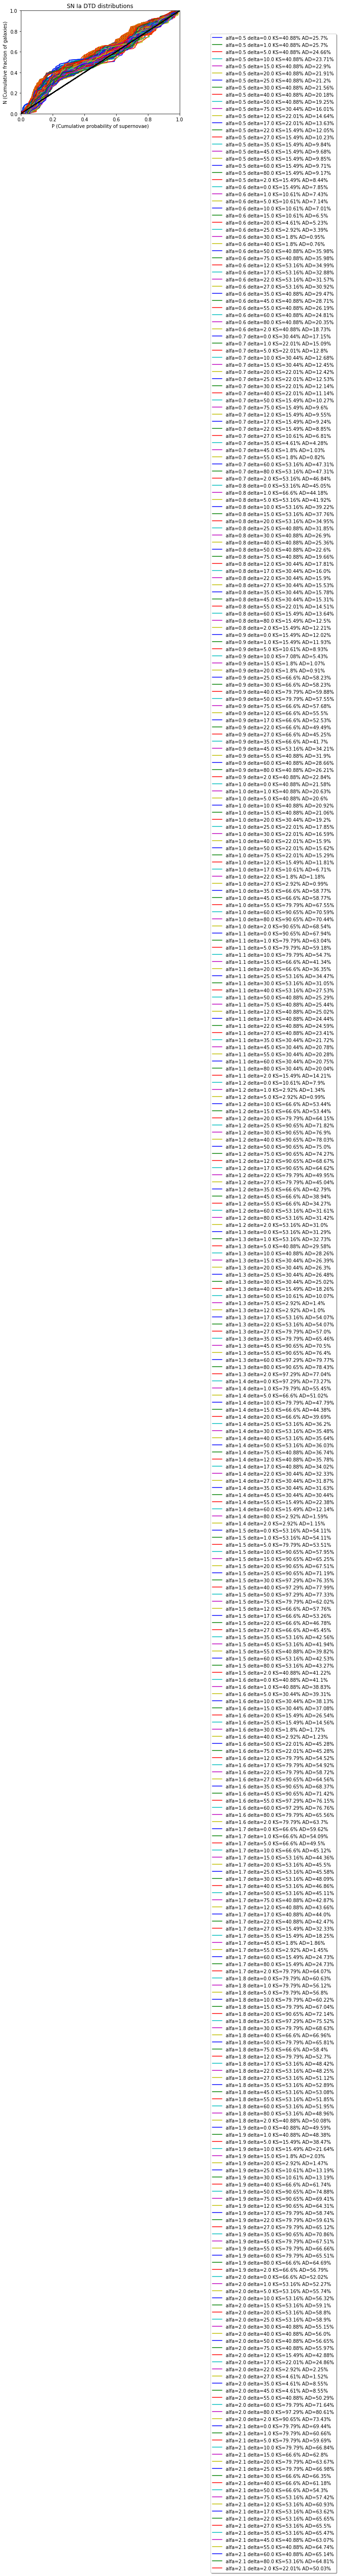

In [134]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_Ia.shape[1]):

    q = float(Dist_DTD_Ia.columns[C][0:3])
    w = float(Dist_DTD_Ia.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_Ia']
    r =Prob_DTD.at[C,'AD_Ia']
    
    plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],N_Ia,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)
plt.show()

In [136]:
Prob_DTD['Mean_Ia'] = (Prob_DTD['KS_Ia']+Prob_DTD['AD_Ia'])/2
Prob_DTD['Mean_CC'] = (Prob_DTD['KS_CC']+Prob_DTD['AD_CC'])/2
Prob_DTD['Mean_Ic'] = (Prob_DTD['KS_Ic']+Prob_DTD['AD_Ic'])/2

Prob_DTD.to_csv('../DTD.csv')

In [137]:
alfa = np.array([-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1])
delta = np.array([0.2,1,5,10,15,20,25,30,40,50,75,100,125,150,175,200,225,250,275,300,350,400,450,500,550,600,800,1000,1500,2000])
P = np.array([
    Prob_DTD['Mean_Ia'][0:30],
    Prob_DTD['Mean_Ia'][30:60],
    Prob_DTD['Mean_Ia'][60:90],
    Prob_DTD['Mean_Ia'][90:120],
    Prob_DTD['Mean_Ia'][120:150],
    Prob_DTD['Mean_Ia'][150:180],
    Prob_DTD['Mean_Ia'][180:210],
    Prob_DTD['Mean_Ia'][210:240],
    Prob_DTD['Mean_Ia'][240:270],
    Prob_DTD['Mean_Ia'][270:300],
    Prob_DTD['Mean_Ia'][300:330],
    Prob_DTD['Mean_Ia'][330:360],
    Prob_DTD['Mean_Ia'][360:390],
    Prob_DTD['Mean_Ia'][390:420],
    Prob_DTD['Mean_Ia'][420:450],
    Prob_DTD['Mean_Ia'][450:480],
    Prob_DTD['Mean_Ia'][480:510]
    ],dtype='float64')

In [138]:
deltaP = np.array([0.1,0.6,2.5,7.5,12.5,17.5,22.5,27.5,35,45,62,87,112,137,162,187,212,237,262,287,325,375,425,475,525,575,700,900,1250,1750,2250])
alfaP = np.array([-0.45,-0.55,-0.65,-0.75,-0.85,-0.95,-1.05,-1.15,-1.25,-1.35,-1.45,-1.55,-1.65,-1.75,-1.85,-1.95,-2.05,-2.15])

deltalg = np.log10(delta)
deltalgP = np.log10(deltaP)

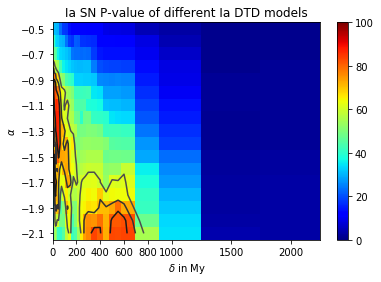

In [139]:
fig0, ax0 = plt.subplots()

c = ax0.pcolor(deltaP,alfaP,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

CS = plt.contour(delta, alfa, P, [60,70,80,90],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=10,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('Ia SN P-value of different Ia DTD models');

ax0.set_xticks([0,200,400,600,800,1000,1500,2000]);
ax0.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1]);

#fig0.savefig("../Pv_modelos_Ia_IaDTD.png")

In [140]:
PIa = P

In [141]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

P_alfa = np.arange(la)
X_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        X_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(PIa[j][i]+ PIa[j][i+1]) / 2
    P_alfa[j] = np.sum(X_alfa)

Z_alfa = np.sum(P_alfa)
    
P_delta = np.arange(ld)
X_delta = np.arange(la)
Y_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        X_delta[i] = np.absolute(PIa[i][j])
    P_delta[j] = np.sum(X_delta)

for i in np.arange(ild-1):
    Y_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(P_delta[i]+P_delta[i+1])/2
Z_delta = np.sum(Y_delta)

P_alfa_li = P_alfa / Z_alfa
P_delta_li = P_delta / Z_delta

In [142]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

P_alfa = np.arange(la)
X_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        X_alfa[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(PIa[j][i]+PIa[j][i+1]) / (2)
    P_alfa[j] = np.sum(X_alfa)

Z_alfa = np.sum(P_alfa)
    
P_delta = np.arange(ld)
X_delta = np.arange(la)
Y_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        X_delta[i] = np.absolute(np.log10(PIa[i][j]))
    P_delta[j] = np.sum(X_delta)

for i in np.arange(ild-1):
    Y_delta[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(P_delta[i]+P_delta[i+1]) / (2 * 10**(P_delta[i+1]))
Z_delta = np.sum(Y_delta)

P_alfa_lo = P_alfa / Z_alfa
P_delta_lo = P_delta / Z_delta

In [143]:
P_alfa_li = P_alfa_li / np.sum(P_alfa_li)
P_delta_li = P_delta_li / np.sum(P_delta_li)

P_alfa_lo = P_alfa_lo / np.sum(P_alfa_lo)
P_delta_lo = P_delta_lo / np.sum(P_delta_lo)

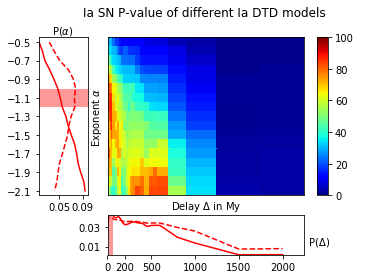

In [144]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltaP,alfaP,PIa,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, PIa, [65,75,85],colors=('0.3','0.3','0.3'))
#Pro.clabel(CS, inline=1, fontsize=10,fmt='%1.f')
Pro.set_xlabel(r'Delay $\Delta$ in My')
Pro.set_ylabel(r'Exponent $\alpha$')
Pro.set_title('Ia SN P-value of different Ia DTD models \n')
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])

al.plot(P_alfa_li,alfa,'-r')
al.plot(P_alfa_lo,alfa,'--r')
al.axhspan(-1.0,-1.2,facecolor='r',alpha=0.4)
al.set_xlim(np.min(P_alfa_li)*0.95,np.max(P_alfa_li)*1.05)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.05,0.09])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])

de.plot(delta,P_delta_li,'r')
de.plot(delta,P_delta_lo,'--r')
de.axvspan(20,60,facecolor='r',alpha=0.4)
de.set_ylim(np.min(P_delta_li)*0.95,np.max(P_delta_lo)*1.05)
de.set_xticks([0,200,500,1000,1500,2000])
de.set_yticks([0.03,0.01])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\Delta$)',rotation='horizontal')
de.set_xlim(0.5,2250)

plt.show()

#fig.savefig("../Pv_modelos_Ia_IaDTD_2.0.png")

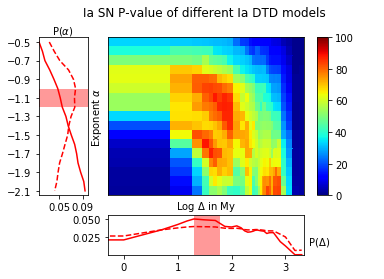

In [145]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltalgP,alfaP,PIa,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, PIa, [65,75,85],colors=('0.3','0.3','0.3'))
#Pro.clabel(CS, inline=1, fontsize=10,fmt='%1.f')
Pro.set_xlabel(r'Log $\Delta$ in My')
Pro.set_ylabel(r'Exponent $\alpha$')
Pro.set_title('Ia SN P-value of different Ia DTD models \n')
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])

al.plot(P_alfa_li,alfa,'-r')
al.plot(P_alfa_lo,alfa,'--r')
al.axhspan(-1.0,-1.2,facecolor='r',alpha=0.4)
al.set_xlim(np.min(P_alfa_li)*0.95,np.max(P_alfa_li)*1.05)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.05,0.09])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])

de.plot(deltalg,P_delta_li,'r')
de.plot(deltalg,P_delta_lo,'--r')
de.axvspan(np.log10(20),np.log10(60),facecolor='r',alpha=0.4)
de.set_ylim(np.min(P_delta_li)*0.95,np.max(P_delta_li)*1.1)
de.set_xticks([0,1,2,3])
de.set_yticks([0.050,0.025])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\Delta$)',rotation='horizontal')
de.set_xlim(-0.30103,3.35218252)

plt.show()

#fig.savefig("../Pv_modelos_Ia_IaDTD_log.png", dpi=300)

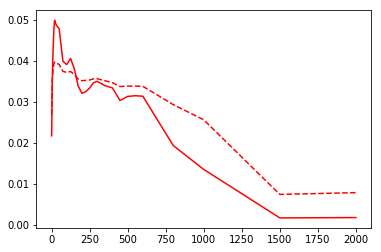

In [56]:
plt.plot(delta,P_delta_li,'-r')
plt.plot(delta,P_delta_lo,'--r')
plt.show()

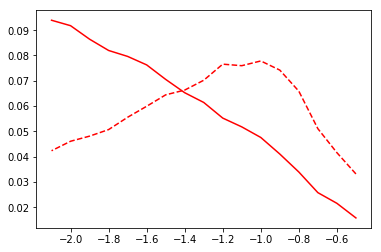

In [57]:
plt.plot(alfa,P_alfa_li,'-r')
plt.plot(alfa,P_alfa_lo,'--r')
plt.show()

In [ ]:
####################### IA DTD II SN ###########################################

IndexError: list index out of range

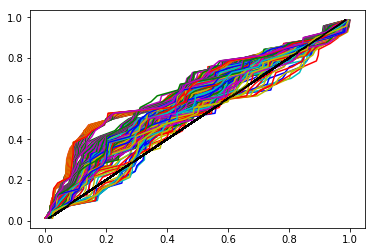

In [58]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_CC.shape[1]):

    q = float(Dist_DTD_CC.columns[C][0:3])
    w = float(Dist_DTD_CC.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_CC']
    r =Prob_DTD.at[C,'AD_CC']
    
    plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[C]],N_CC,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)
plt.show()

In [59]:
alfa = np.array([-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1])
delta = np.array([0.2,1,5,10,15,20,25,30,40,50,75,100,125,150,175,200,225,250,275,300,350,400,450,500,550,600,800,1000,1500,2000])
P = np.array([
    Prob_DTD['Mean_CC'][0:30],
    Prob_DTD['Mean_CC'][30:60],
    Prob_DTD['Mean_CC'][60:90],
    Prob_DTD['Mean_CC'][90:120],
    Prob_DTD['Mean_CC'][120:150],
    Prob_DTD['Mean_CC'][150:180],
    Prob_DTD['Mean_CC'][180:210],
    Prob_DTD['Mean_CC'][210:240],
    Prob_DTD['Mean_CC'][240:270],
    Prob_DTD['Mean_CC'][270:300],
    Prob_DTD['Mean_CC'][300:330],
    Prob_DTD['Mean_CC'][330:360],
    Prob_DTD['Mean_CC'][360:390],
    Prob_DTD['Mean_CC'][390:420],
    Prob_DTD['Mean_CC'][420:450],
    Prob_DTD['Mean_CC'][450:480],
    Prob_DTD['Mean_CC'][480:510]
    ],dtype='float64')

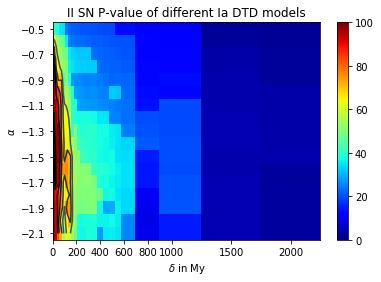

In [60]:
fig0, ax0 = plt.subplots()

c = ax0.pcolor(deltaP,alfaP,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

CS = plt.contour(delta, alfa, P, [60,70,80,90],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=10,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('II SN P-value of different Ia DTD models');

ax0.set_xticks([0,200,400,600,800,1000,1500,2000]);
ax0.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1]);

#fig0.savefig("../Pv_modelos_II_IaDTD.png")

In [61]:
Pcc = P

In [62]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pcc_alfa = np.arange(la)
Xcc_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xcc_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pcc[j][i]+ Pcc[j][i+1]) / 2
    Pcc_alfa[j] = np.sum(Xcc_alfa)

Zcc_alfa = np.sum(Pcc_alfa)
    
Pcc_delta = np.arange(ld)
Xcc_delta = np.arange(la)
Ycc_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xcc_delta[i] = np.absolute(Pcc[i][j])
    Pcc_delta[j] = np.sum(Xcc_delta)

for i in np.arange(ild-1):
    Ycc_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pcc_delta[i]+Pcc_delta[i+1])/2
Zcc_delta = np.sum(Ycc_delta)

Pcc_alfa_li = Pcc_alfa / Zcc_alfa
Pcc_delta_li = Pcc_delta / Zcc_delta

In [63]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pcc_alfa = np.arange(la)
Xcc_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xcc_alfa[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(Pcc[j][i]+Pcc[j][i+1]) / (2)
    Pcc_alfa[j] = np.sum(Xcc_alfa)

Zcc_alfa = np.sum(Pcc_alfa)
    
Pcc_delta = np.arange(ld)
Xcc_delta = np.arange(la)
Ycc_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xcc_delta[i] = np.absolute(np.log10(Pcc[i][j]))
    Pcc_delta[j] = np.sum(Xcc_delta)

for i in np.arange(ild-1):
    Ycc_delta[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(P_delta[i]+P_delta[i+1]) / (2 * 10**(P_delta[i+1]))
Zcc_delta = np.sum(Ycc_delta)

Pcc_alfa_lo = Pcc_alfa / Zcc_alfa
Pcc_delta_lo = Pcc_delta / Zcc_delta

In [64]:
Pcc_alfa_li = Pcc_alfa_li / np.sum(Pcc_alfa_li)
Pcc_delta_li = Pcc_delta_li / np.sum(Pcc_delta_li)

Pcc_alfa_lo = Pcc_alfa_lo / np.sum(Pcc_alfa_lo)
Pcc_delta_lo = Pcc_delta_lo / np.sum(Pcc_delta_lo)

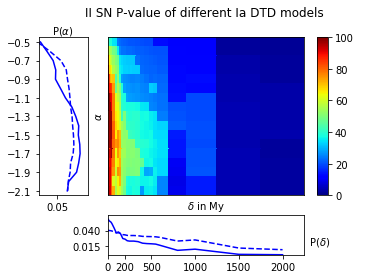

In [65]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltaP,alfaP,Pcc,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'$\delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('II SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pcc_alfa_li,alfa,'b')
al.plot(Pcc_alfa_lo,alfa,'--b')
al.set_xlim(np.min(Pcc_alfa_li)*0.95,np.max(Pcc_alfa_li)*1.1)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.05])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])


de.plot(delta,Pcc_delta_li,'b')
de.plot(delta,Pcc_delta_lo,'--b')
de.set_ylim(np.min(Pcc_delta_li)*0.95,np.max(Pcc_delta_li)*1.1)
de.set_xticks([0,200,500,1000,1500,2000])
de.set_yticks([0.015,0.04])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\delta$)',rotation='horizontal')
de.set_xlim(0,2250)

plt.show()

#fig.savefig("../Pv_modelos_II_IaDTD.png")

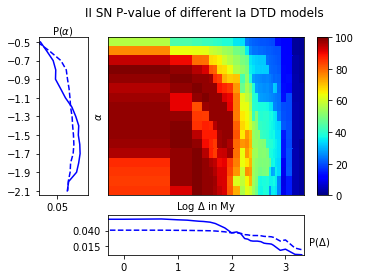

In [66]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltalgP,alfaP,Pcc,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'Log $\Delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('II SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pcc_alfa_li,alfa,'b')
al.plot(Pcc_alfa_lo,alfa,'--b')
al.set_xlim(np.min(Pcc_alfa_li)*0.95,np.max(Pcc_alfa_li)*1.1)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.05])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])


de.plot(deltalg,Pcc_delta_li,'b')
de.plot(deltalg,Pcc_delta_lo,'--b')
de.set_ylim(np.min(Pcc_delta_li)*0.95,np.max(Pcc_delta_li)*1.1)
de.set_xticks([0,1,2,3])
de.set_yticks([0.015,0.04])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\Delta$)',rotation='horizontal')
de.set_xlim(-0.30103,3.35218252)

plt.show()

#fig.savefig("../Pv_modelos_II_IaDTD_log.png", dpi=300)

In [ ]:
####################### IA DTD Ic SN ###########################################

IndexError: list index out of range

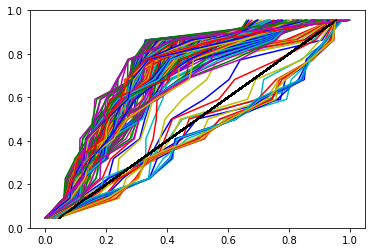

In [67]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_Ic.shape[1]):

    q = float(Dist_DTD_Ic.columns[C][0:3])
    w = float(Dist_DTD_Ic.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_Ic']
    r =Prob_DTD.at[C,'AD_Ic']
    
    plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[C]],N_Ic,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic IaDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

In [68]:
alfa = np.array([-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1])
delta = np.array([0.2,1,5,10,15,20,25,30,40,50,75,100,125,150,175,200,225,250,275,300,350,400,450,500,550,600,800,1000,1500,2000])
P = np.array([
    Prob_DTD['Mean_Ic'][0:30],
    Prob_DTD['Mean_Ic'][30:60],
    Prob_DTD['Mean_Ic'][60:90],
    Prob_DTD['Mean_Ic'][90:120],
    Prob_DTD['Mean_Ic'][120:150],
    Prob_DTD['Mean_Ic'][150:180],
    Prob_DTD['Mean_Ic'][180:210],
    Prob_DTD['Mean_Ic'][210:240],
    Prob_DTD['Mean_Ic'][240:270],
    Prob_DTD['Mean_Ic'][270:300],
    Prob_DTD['Mean_Ic'][300:330],
    Prob_DTD['Mean_Ic'][330:360],
    Prob_DTD['Mean_Ic'][360:390],
    Prob_DTD['Mean_Ic'][390:420],
    Prob_DTD['Mean_Ic'][420:450],
    Prob_DTD['Mean_Ic'][450:480],
    Prob_DTD['Mean_Ic'][480:510]
    ],dtype='float64')

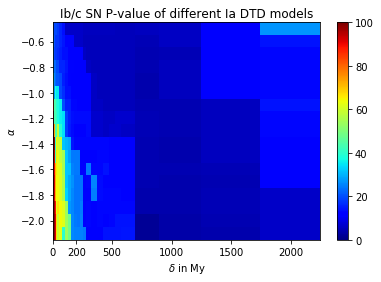

In [69]:
fig0, ax0 = plt.subplots()

c = ax0.pcolor(deltaP,alfaP,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

#CS = plt.contour(delta, alfa, P, [60,75,90,95],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=14,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('Ib/c SN P-value of different Ia DTD models');

ax0.set_xticks([0,200,500,1000,1500,2000]);

#fig0.savefig("../Pv_modelos_Ic_IaDTD.png")

In [70]:
Pic = P

In [71]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pic_alfa = np.arange(la)
Xic_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xic_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pic[j][i]+ Pic[j][i+1]) / 2
    Pic_alfa[j] = np.sum(Xic_alfa)

Zic_alfa = np.sum(Pic_alfa)
    
Pic_delta = np.arange(ld)
Xic_delta = np.arange(la)
Yic_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xic_delta[i] = np.absolute(Pic[i][j])
    Pic_delta[j] = np.sum(Xic_delta)

for i in np.arange(ild-1):
    Yic_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pic_delta[i]+Pic_delta[i+1])/2
Zic_delta = np.sum(Yic_delta)

Pic_alfa_li = Pic_alfa / Zic_alfa
Pic_delta_li = Pic_delta / Zic_delta

In [72]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pic_alfa = np.arange(la)
Xic_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xic_alfa[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(Pic[j][i]+Pic[j][i+1]) / (2)
    Pic_alfa[j] = np.sum(Xic_alfa)

Zic_alfa = np.sum(Pic_alfa)
    
Pic_delta = np.arange(ld)
Xic_delta = np.arange(la)
Yic_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xic_delta[i] = np.absolute(np.log10(Pic[i][j]))
    Pic_delta[j] = np.sum(Xic_delta)

for i in np.arange(ild-1):
    Yic_delta[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(P_delta[i]+P_delta[i+1]) / (2 * 10**(P_delta[i+1]))
Zic_delta = np.sum(Yic_delta)

Pic_alfa_lo = Pic_alfa / Zic_alfa
Pic_delta_lo = Pic_delta / Zic_delta

In [73]:
Pic_alfa_li = Pic_alfa_li / np.sum(Pic_alfa_li)
Pic_delta_li = Pic_delta_li / np.sum(Pic_delta_li)

Pic_alfa_lo = Pic_alfa_lo / np.sum(Pic_alfa_lo)
Pic_delta_lo = Pic_delta_lo / np.sum(Pic_delta_lo)

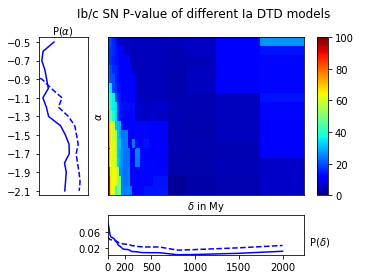

In [74]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltaP,alfaP,Pic,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'$\delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('Ib/c SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pic_alfa_li,alfa,'b')
al.plot(Pic_alfa_lo,alfa,'--b')
al.set_xlim(np.min(Pic_alfa_li)*0.95,np.max(Pic_alfa_li)*1.2)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.15])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])


de.plot(delta,Pic_delta_li,'b')
de.plot(delta,Pic_delta_lo,'--b')
de.set_ylim(np.min(Pic_delta_li)*0.95,np.max(Pic_delta_li)*1.2)
de.set_xticks([0,200,500,1000,1500,2000])
de.set_yticks([0.06,0.02])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\delta$)',rotation='horizontal')
de.set_xlim(0,2250)

plt.show()

#fig.savefig("../Pv_modelos_Ic_IaDTD_2.0.png")

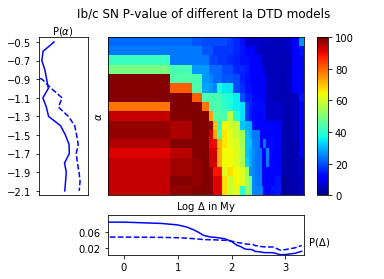

In [75]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(deltalgP,alfaP,Pic,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'Log $\Delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('Ib/c SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pic_alfa_li,alfa,'b')
al.plot(Pic_alfa_lo,alfa,'--b')
al.set_xlim(np.min(Pic_alfa_li)*0.95,np.max(Pic_alfa_li)*1.2)
al.set_yticks([-0.5,-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.1])
al.set_xticks([0.15])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.15,-0.45)

de = plt.subplot(gs[4])


de.plot(deltalg,Pic_delta_li,'b')
de.plot(deltalg,Pic_delta_lo,'--b')
de.set_ylim(np.min(Pic_delta_li)*0.95,np.max(Pic_delta_li)*1.2)
de.set_xticks([0,1,2,3])
de.set_yticks([0.06,0.02])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\Delta$)',rotation='horizontal')
de.set_xlim(-0.30103,3.35218252)

plt.show()

#fig.savefig("../Pv_modelos_Ic_IaDTD_log_AD.png", dpi=300)

In [76]:
a = np.arange(Dist_DTD_Ic.shape[1])*0
for C in np.arange(Dist_DTD_Ic.shape[1]):
    a[C]=np.round((Prob_DTD.at[C,'KS_Ic']+Prob_DTD.at[C,'AD_Ic'])/2,2)
np.argmax(a)

182

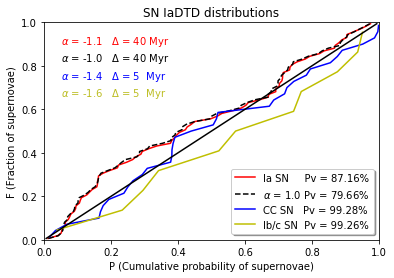

In [207]:
color = ['r','b','--k','y']
    
plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[134]],N_Ia,color[0],label='Ia SN     Pv = {}%'.format(np.round(PIa[6,8],2)))

plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[113]],N_Ia,color[2],label=r'$\alpha$ = 1.0 Pv = {}%'.format(np.round(PIa[5,8],2)))
     
plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[191]],N_CC,color[1],label='CC SN   Pv = {}%'.format(np.round(Pcc[9,2],2)))

plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[212]],N_Ic,color[3],label='Ib/c SN  Pv = {}%'.format(np.round(Pic[11,2],2)))
   
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN IaDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.text(0.05, 0.9,  r'$\alpha$ = -1.1   $\Delta$ = 40 Myr',color='red')
plt.text(0.05, 0.82,  r'$\alpha$ = -1.0   $\Delta$ = 40 Myr',color='black')
plt.text(0.05, 0.74,  r'$\alpha$ = -1.4   $\Delta$ = 5  Myr' ,color='blue')
plt.text(0.05, 0.66,  r'$\alpha$ = -1.6   $\Delta$ = 5  Myr' ,color='C8')

plt.legend(bbox_to_anchor=(1.0, 0, 0, 0.35),shadow=True)


#plt.savefig("../IaDTD_Distribution.png",dpi=300)

plt.show()

In [ ]:
####################### SFR DTD ###########################################

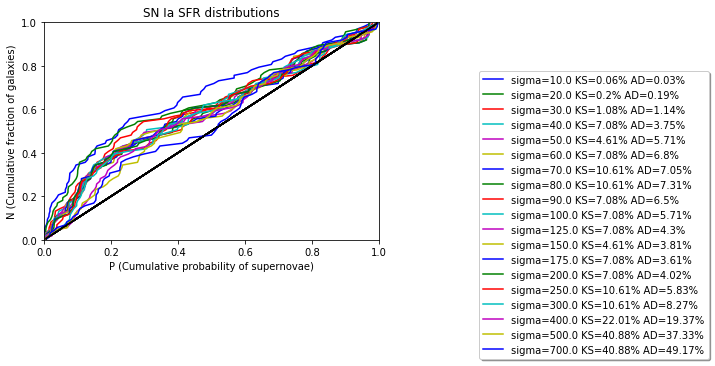

In [210]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_SFR_Ia.shape[1]):
    
    q = float(Dist_SFR_Ia.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_Ia']
    r =Prob_SFR.at[C,'AD_Ia']
    
    plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],N_Ia,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

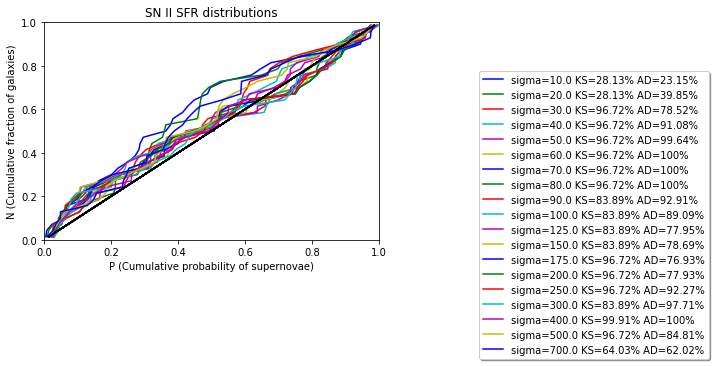

In [211]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']


for C in np.arange(Dist_SFR_CC.shape[1]):
    
    q = float(Dist_SFR_CC.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_CC']
    r =Prob_SFR.at[C,'AD_CC']
    
    
    plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[C]],N_CC,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

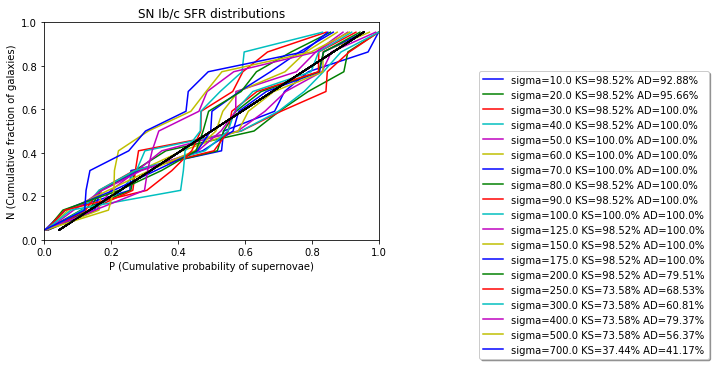

In [212]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']


for C in np.arange(Dist_SFR_Ic.shape[1]):
    
    q = float(Dist_SFR_Ic.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_Ic']
    r =Prob_SFR.at[C,'AD_Ic']
    
    
    plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[C]],N_Ic,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ib/c SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

In [213]:
Prob_SFR['Mean_Ia'] = (Prob_SFR['KS_Ia']+Prob_SFR['AD_Ia'])/2
Prob_SFR['Mean_CC'] = (Prob_SFR['KS_CC']+Prob_SFR['AD_CC'])/2
Prob_SFR['Mean_Ic'] = (Prob_SFR['KS_Ic']+Prob_SFR['AD_Ic'])/2

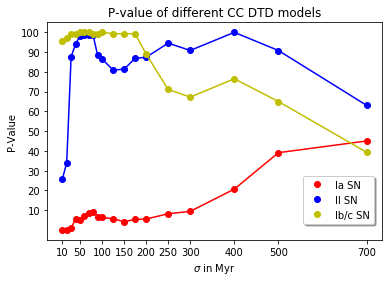

In [214]:
sigma = [10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,400,500,700]

IaP = np.array(Prob_SFR['Mean_Ia'],dtype='float64')
ccP = np.array(Prob_SFR['Mean_CC'],dtype='float64')
IcP = np.array(Prob_SFR['Mean_Ic'],dtype='float64')

fig, ax = plt.subplots()

ax.set_xlabel(r'$\sigma$ in Myr')
ax.set_ylabel('P-Value')
ax.set_title('P-value of different CC DTD models');

plt.plot(sigma,IaP,'.r',markersize=12,label='Ia SN')
plt.plot(sigma,IaP,'-r')

plt.plot(sigma,ccP,'.b',markersize=12,label='II SN')
plt.plot(sigma,ccP,'-b')

plt.plot(sigma,IcP,'.y',markersize=12,label='Ib/c SN')
plt.plot(sigma,IcP,'-y')

ax.set_xticks([10,50,100,150,200,250,300,400,500,700]);
ax.set_yticks([10,20,30,40,50,60,70,80,90,100]);

plt.legend(bbox_to_anchor=(0.75, 0.05, 0, 0.95),shadow=True) 

#fig.savefig("../Pv_modelos_CC_ccDTD_2.0_AD.png",pdi=300)

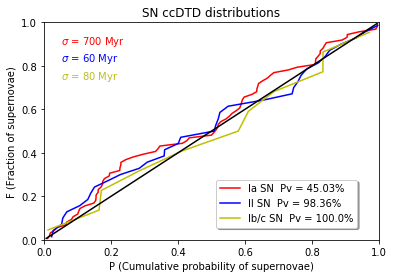

In [246]:
color = ['r','b','y']

plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[18]],N_Ia,color[0],label='Ia SN  Pv = {}%'.format(np.round((Prob_SFR.at[18,'KS_Ia']+Prob_SFR.at[18,'AD_Ia'])/2,2)))
#plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[2]],N_Ia,''+color[0]+'.')
     
plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[6]],N_CC,color[1],label='II SN  Pv = {}%'.format(np.round((Prob_SFR.at[6,'KS_CC']+Prob_SFR.at[6,'AD_CC'])/2,2)))
#plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[2]],N_CC,''+color[1]+'.')   

plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[5]],N_Ic,color[2],label='Ib/c SN  Pv = {}%'.format(np.round((Prob_SFR.at[5,'KS_Ic']+Prob_SFR.at[5,'AD_Ic'])/2,2)))
#plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[2]],N_Ic,''+color[1]+'.')   

plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN ccDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.text(0.05, 0.9,  r'$\sigma$ = 700 Myr' ,color='red')
plt.text(0.05, 0.82, r'$\sigma$ = 60 Myr'  ,color='blue')
plt.text(0.05, 0.74, r'$\sigma$ = 80 Myr'  ,color='C8')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.3),shadow=True)    

#plt.savefig("../ccDTD_Distribution.png",pdi=300)

plt.show()

In [ ]:
####################### Ha DTD ###########################################

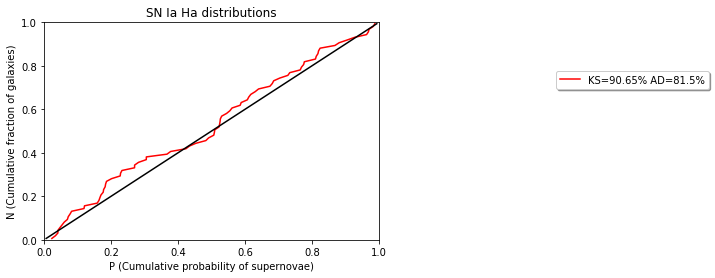

In [12]:
color = ['r']


for C in np.arange(Dist_Ha_Ia.shape[1]):
    
    e = Prob_Ha.at[C,'KS_Ia']
    r =Prob_Ha.at[C,'AD_Ia']
    
    plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

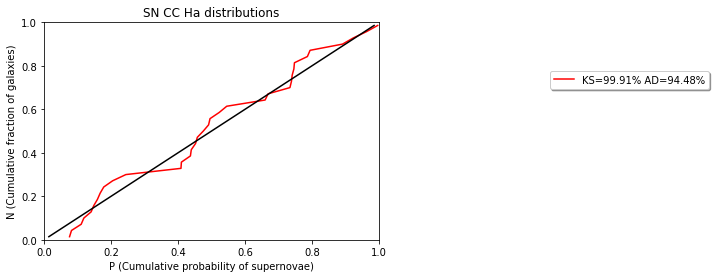

In [13]:
color = ['r']


for C in np.arange(Dist_Ha_CC.shape[1]):
    
    e = Prob_Ha.at[C,'KS_CC']
    r =Prob_Ha.at[C,'AD_CC']
    
    plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

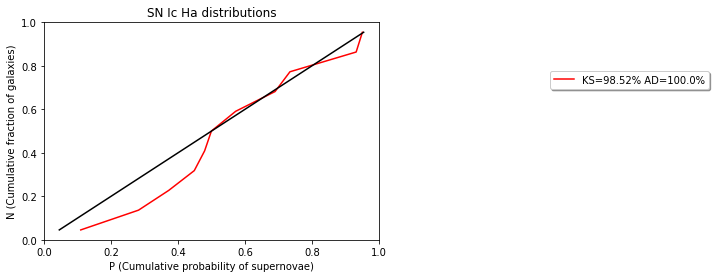

In [14]:
color = ['r']


for C in np.arange(Dist_Ha_CC.shape[1]):
    
    e = Prob_Ha.at[C,'KS_Ic']
    r =Prob_Ha.at[C,'AD_Ic']
    
    plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ib/c Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

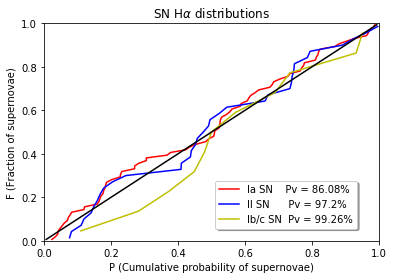

In [32]:
color = ['r','b','y']

plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[0]],N_Ia,color[0],label='Ia SN    Pv = {}%'.format(np.round((Prob_Ha.at[0,'KS_Ia']+Prob_Ha.at[0,'AD_Ia'])/2,2)))
#plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[2]],N_Ia,''+color[0]+'.')

plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[0]],N_CC,color[1],label='II SN      Pv = {}%'.format(np.round((Prob_Ha.at[0,'KS_CC']+Prob_Ha.at[0,'AD_CC'])/2,2)))
#plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = {}%'.format(np.round((Prob_Ha.at[0,'KS_Ic']+Prob_Ha.at[0,'AD_Ic'])/2,2)))
#plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[2]],N_Ic,''+color[1]+'.')

plt.plot(N_Ia,N_Ia,'k')
    
plt.title(r'SN H$\alpha$ distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.3),shadow=True)    

#plt.savefig("../Ha_Distribution_2.0.png",pdi=300)

plt.show()

In [ ]:
####################### MASS DTD ###########################################

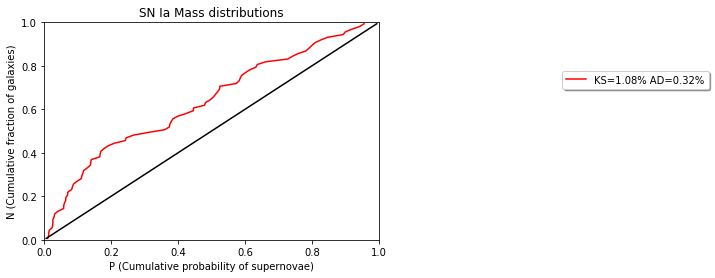

In [16]:
color = ['r']



for C in np.arange(Dist_Mass_Ia.shape[1]):
    
    e = Prob_Mass.at[C,'KS_Ia']
    r =Prob_Mass.at[C,'AD_Ia']
    
    plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

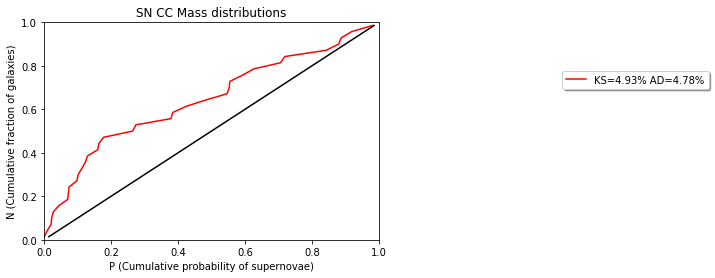

In [17]:
color = ['r']


for C in np.arange(Dist_Mass_CC.shape[1]):
    
    e = Prob_Mass.at[C,'KS_CC']
    r =Prob_Mass.at[C,'AD_CC']
    
    plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

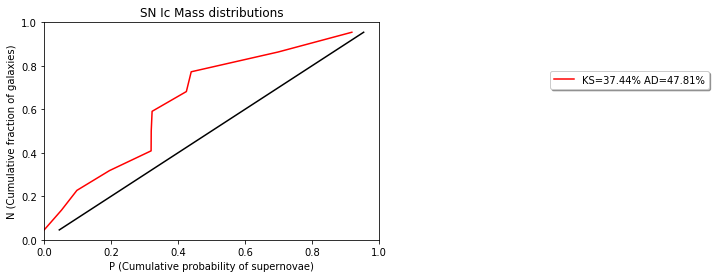

In [18]:
color = ['r']


for C in np.arange(Dist_Mass_Ic.shape[1]):
    
    e = Prob_Mass.at[C,'KS_Ic']
    r =Prob_Mass.at[C,'AD_Ic']
    
    plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ib/c Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

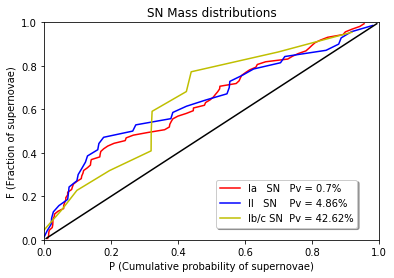

In [21]:
color = ['r','b','y']
    
plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[0]],N_Ia,color[0],label='Ia   SN   Pv = {}%'.format(np.round((Prob_Mass.at[0,'KS_Ia']+Prob_Mass.at[0,'AD_Ia'])/2,2)))
#plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[0]],N_CC,color[1],label='II   SN    Pv = {}%'.format(np.round((Prob_Mass.at[0,'KS_CC']+Prob_Mass.at[0,'AD_CC'])/2,2)))
#plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = {}%'.format(np.round((Prob_Mass.at[0,'KS_Ic']+Prob_Mass.at[0,'AD_Ic'])/2,2)))
#plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.3),shadow=True)    

#plt.savefig("../Mass_Distribution_2.0.png",pdi=300)

plt.show()

In [ ]:
####################### ZA DTD ###########################################

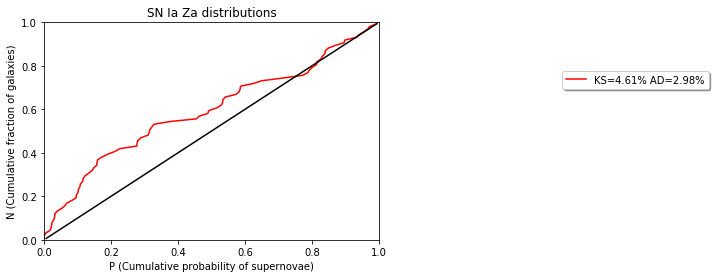

In [20]:
color = ['r']


for C in np.arange(Dist_Za_Ia.shape[1]):
    
    e = Prob_Za.at[C,'KS_Ia']
    r =Prob_Za.at[C,'AD_Ia']
    
    plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

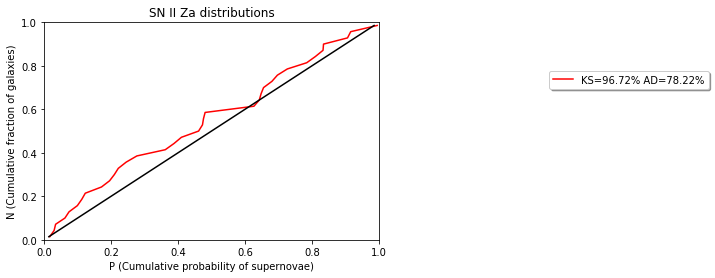

In [21]:
color = ['r']


for C in np.arange(Dist_Za_CC.shape[1]):
    
    e = Prob_Za.at[C,'KS_CC']
    r =Prob_Za.at[C,'AD_CC']
    
    plt.plot(Dist_Za_CC[Dist_Za_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_CC[Dist_Za_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

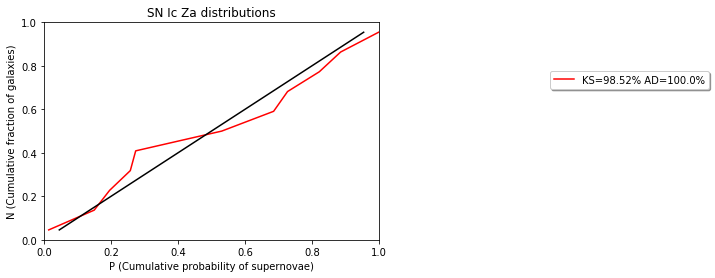

In [22]:
color = ['r']


for C in np.arange(Dist_Za_Ic.shape[1]):
    
    e = Prob_Za.at[C,'KS_Ic']
    r =Prob_Za.at[C,'AD_Ic']
    
    plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ib/c Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

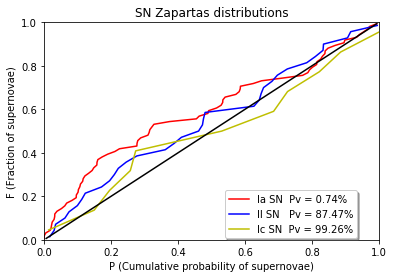

In [23]:
color = ['r','b','y']
    
plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 0.74%')
#plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_Za_CC[Dist_Za_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 87.47%')
#plt.plot(Dist_Za_CC[Dist_Za_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = 99.26%')
#plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../Za_Distribution_2.0.png")

plt.show()

In [ ]:
####################### ZAB DTD ###########################################

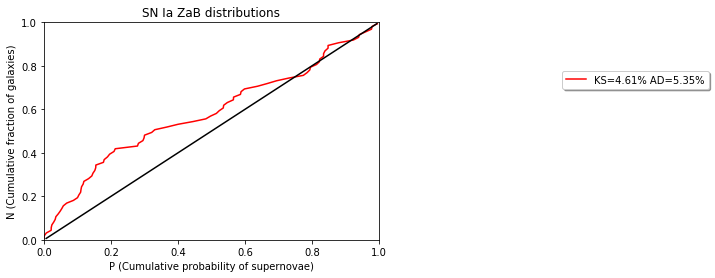

In [10]:
color = ['r']


for C in np.arange(Dist_ZaB_Ia.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_Ia']
    r =Prob_ZaB.at[C,'AD_Ia']
    
    plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

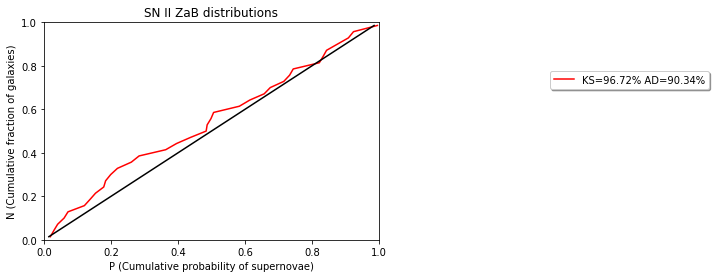

In [11]:
color = ['r']


for C in np.arange(Dist_ZaB_CC.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_CC']
    r =Prob_ZaB.at[C,'AD_CC']
    
    plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

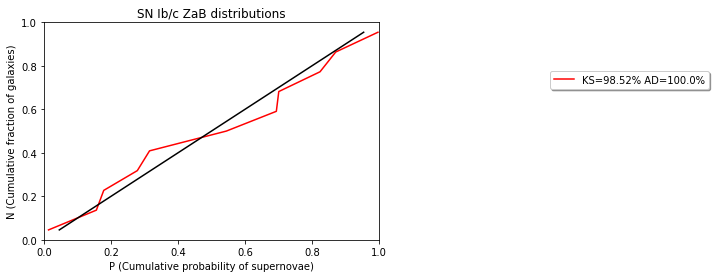

In [12]:
color = ['r']


for C in np.arange(Dist_ZaB_Ic.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_Ic']
    r =Prob_ZaB.at[C,'AD_Ic']
    
    plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ib/c ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

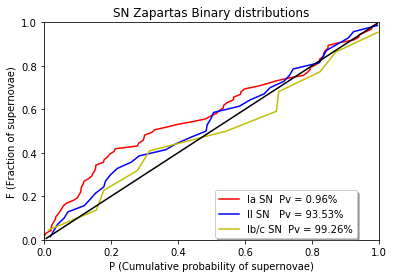

In [13]:
color = ['r','b','y']
    
plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 0.96%')
#plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 93.53%')
#plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = 99.26%')
#plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas Binary distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../ZaB_Distribution_2.0.png")

plt.show()

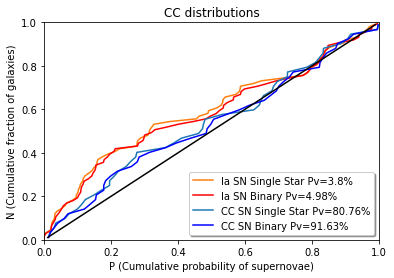

In [14]:
a = Dist_ZaB_CC[Dist_ZaB_CC.columns[0]]
b = Dist_ZaB_Ic[Dist_ZaB_Ic.columns[0]]


s = np.arange(float(len(a)+len(b)))

for i in np.arange(len(a)):
    s[i] = a[i]
    
for i in np.arange(len(b)):
    s[len(a)+i] = b[i]

ZaB = np.sort(s)
N = np.arange(len(s))
N = N + 0.5
N = np.double(N)/(len(N))

KSB  = ks_2samp(ZaB,  N)[1]
KSB = np.around(KSB*100,2)
ADB  = anderson_ksamp([ZaB,  N])[2]
ADB  = np.absolute(np.around(ADB*100,2))

if ADB > 100:
    ADB = 100

#----------------------------
a = Dist_Za_CC[Dist_Za_CC.columns[0]]
b = Dist_Za_Ic[Dist_Za_Ic.columns[0]]


s = np.arange(float(len(a)+len(b)))

for i in np.arange(len(a)):
    s[i] = a[i]
    
for i in np.arange(len(b)):
    s[len(a)+i] = b[i]

Za = np.sort(s)
N = np.arange(len(s))
N = N + 0.5
N = np.double(N)/(len(N))

KS  = ks_2samp(Za,  N)[1]
KS = np.around(KS*100,2)
AD  = anderson_ksamp([Za,  N])[2]
AD  = np.absolute(np.around(AD*100,2))

if AD > 100:
    AD = 100

eB = Prob_ZaB.at[C,'KS_Ia']
rB =Prob_ZaB.at[C,'AD_Ia']
tB = Dist_ZaB_Ia[Dist_ZaB_Ia.columns[0]]

e = Prob_Za.at[C,'KS_Ia']
r =Prob_Za.at[C,'AD_Ia']
t = Dist_Za_Ia[Dist_Za_Ia.columns[0]]

#----------------------------
plt.plot(t,N_Ia,color='C1',label='Ia SN Single Star Pv={}%'.format(np.around((e+r)/2,2)))
plt.plot(tB,N_Ia,'r',label='Ia SN Binary Pv={}%'.format(np.around((eB+rB)/2,2)))
plt.plot(Za,N, color='C0',label='CC SN Single Star Pv={}%'.format(np.around((KS+AD)/2,2)))
plt.plot(ZaB,N,'b',label='CC SN Binary Pv={}%'.format(np.around((KSB+ADB)/2,2)))
plt.plot(N,N,'k')

plt.title('CC distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(0, 0, 1, 0.8),shadow=True)

#plt.savefig("../CC_Distributions_2.0.png",pdi=300)

plt.show()

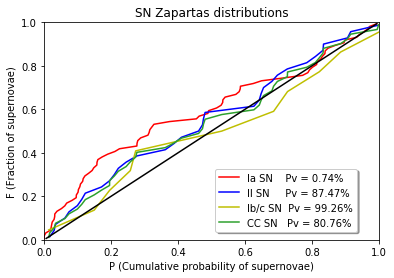

In [28]:
color = ['r','b','y']
    
plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[0]],N_Ia,color[0],label='Ia SN    Pv = 0.74%')
#plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_Za_CC[Dist_Za_CC.columns[0]],N_CC,color[1],label='II SN     Pv = 87.47%')
#plt.plot(Dist_Za_CC[Dist_Za_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = 99.26%')
#plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[2]],N_Ic,''+color[1]+'.')

plt.plot(Za,N, color='C2',label='CC SN   Pv = {}%'.format(np.around((KS+AD)/2,2)))

plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.35),shadow=True)    

#plt.savefig("../Za_Distribution_2.0.png")

plt.show()

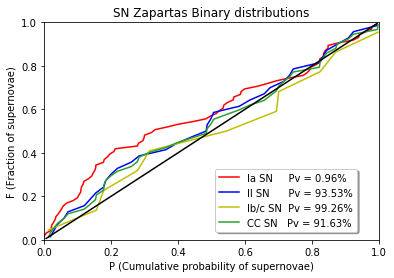

In [25]:
color = ['r','b','y']
    
plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[0]],N_Ia,color[0],label='Ia SN     Pv = 0.96%')
#plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[0]],N_CC,color[1],label='II SN      Pv = 93.53%')
#plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[0]],N_Ic,color[2],label='Ib/c SN  Pv = 99.26%')
#plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[2]],N_Ic,''+color[1]+'.')

plt.plot(ZaB,N, color='C2',label='CC SN   Pv = {}%'.format(np.around((KSB+ADB)/2,2)))
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas Binary distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.35),shadow=True)    

#plt.savefig("../ZaB_Distribution_2.0.png")

plt.show()